In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('book', quiet=True)
from nltk.book import *
from nltk.tokenize import RegexpTokenizer, WordPunctTokenizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [13]:
data = nltk.corpus.gutenberg.raw('austen-emma.txt')
data = data[:1000]

# 단어 단위 토그나이징
tokenizer = WordPunctTokenizer() # 띄어쓰기 단위 토그나이징
data = tokenizer(data)

# 불용어 제거
data = [each_word for each_word in data if(each_word not in stopwords.words())]

# 단어별 언급 빈도 확인
data_cnt = dict(Counter(data))
# data_cnt = Counter(data)
# data_cnt = dict(data_cnt)
data_cnt

# 그래프 표시
data_graph = nltk.Test

# 워드 글라우드 그리기 
wordcloud = WordCloud().generate_from_frequencies(data_cnt) 
plt.figure(figsize=(8,4)) 
plt.imshow(wordcloud) 
plt.axis('on') 
plt.show()



TypeError: 'WordPunctTokenizer' object is not callable

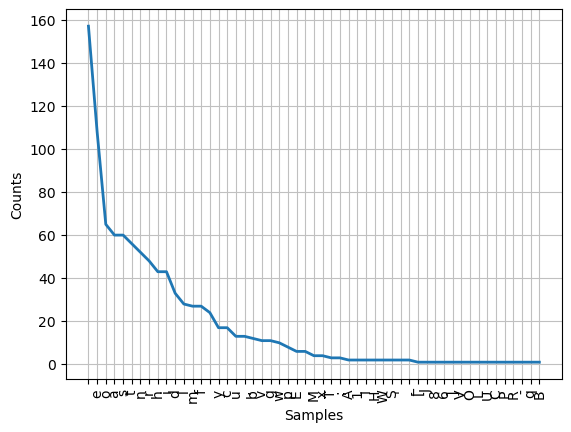

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
# 단어별 언급 빈도 그래프
data_graph = nltk.Text(data, name='word count')
data_graph.plot()

In [5]:
from konlpy.tag import Okt

okt = Okt()
data = "오늘 날씨가 추워서 기분이 좋지않다."

# 형태소 단위 분석
okt.morphs(data)

# 명사 추출
okt.nouns(data)

['오늘', '날씨', '기분']

    1. [목적]
    
    네이버 영화리뷰 데이터셋을 이용해서 긍정/부정 분류 모델
    TF-IDF 적용

    2. [데이터 수집]

    네이버 영화 리뷰 데이터 사용

In [6]:
from collections import Counter
import pandas as pd
import numpy as np


In [7]:
df = pd.read_csv('221028_ratings.txt', delimiter="\t")
df

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


Data Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [44]:
# NaN Drop
df.dropna(inplace = True) 
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [45]:
# Train, Test Data 
X = df['document']
y = df['label']

print(len(X))
print(len(y))

199992
199992


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((149994,), (149994,), (49998,), (49998,))

In [ ]:
from konlpy.tag import Okt
okt = Okt()

# 명사 토큰화
def Tokenizer(text):
    return okt.nouns(text)

### 두글자 이상 단어만 추출

In [ ]:
# x = df['document'][:1000]

# n = []
 
# for i in  x:
#     n.append(i)

# okt = Okt()
# noun = okt.nouns(str(n))

In [ ]:
noun_list = [n for n in noun_list if len(n)>1]
noun_list[:10]

### 단어별 개수 세기

In [12]:
counts = Counter(noun_list)
tags = counts.most_common(1000)
tags

NameError: name 'noun_list' is not defined

In [11]:
dic = dict(count.most_common(1000))
dic

('64bit', 'WindowsPE')


### 워드 클라우드 생성

In [42]:
from PIL import Image # 워드클라우드용 마스크를 생성하기 위한 라이브러리
from wordcloud import wordcloud
import matplotlib.pyplot as plt 

# pip install PlL
# 오류 : ImportError: cannot import name 'image' from 'PIL' (c:\Users\user\anaconda3\lib\site-packages\PIL\__init__.py)
